In [ ]:
cd drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray

/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray


In [ ]:
ls

chest_xray/  Chest_xray_CNN.ipynb


In [ ]:
import zipfile
import cv2,os,numpy as np,matplotlib.pyplot as plt
from tqdm import tqdm

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# with zipfile.ZipFile('chest_xray.zip') as f:
#   f.extractall()

In [ ]:
cd chest_xray/train

/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train


In [ ]:
ls

Chest_xray.h5  img_generation/  NORMAL/  NORMAL.jpeg  pnemonia.jpeg  PNEUMONIA/


### Here we can see this dataset is imbalanced dataset

In [ ]:
print(f'The length of NORMMAL images are :',len(os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/NORMAL/')))
print(f'The length of PNEMONIA images are :',len(os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/PNEUMONIA/')))

The length of NORMMAL images are : 1584
The length of PNEMONIA images are : 4274


In [ ]:
4274-1584

2690

In [ ]:
mkdir img_generation

mkdir: cannot create directory ‘img_generation’: File exists


In [ ]:
ls

img_generation/  NORMAL/  PNEUMONIA/


In [ ]:
img = iter(os.listdir('/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/NORMAL'))

In [ ]:
def img_read():
  c = 0
  try:
    image = cv2.imread('/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/NORMAL/'+next(img),0)
    image1 = image.reshape(1,image.shape[0],image.shape[1],1)
    return image1
  except Exception as e:
    pass
  # finally:
  #   return image

In [ ]:
image_batch = []
for i in range(2690):
  image_batch.append(img_read())
print(len(image_batch))

2690


In [ ]:
img_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30)#,brightness_range=(10,20))

In [ ]:
i = 0
for batch in img_gen.flow(image_batch,batch_size=1,save_to_dir='/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/img_generation_data1',save_format='jpg',save_prefix='chest'):
  i +=1
  if i>=2690:
    break

In [ ]:
len(os.listdir('/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/img_generation'))

2368

In [ ]:
print('The length of Normal images are    :',1584+2368)
print(f'The length of PNEMONIA images are :',len(os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/PNEUMONIA/')))

The length of Normal images are    : 3952
The length of PNEMONIA images are : 4274


In [ ]:
for each in os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train'):
  print(each)

PNEUMONIA
NORMAL
img_generation


In [ ]:
# rm -r .DS_Store

In [ ]:
labels = []
data = []
for each in tqdm(os.listdir('/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train')):
  # print(each)
  for img in tqdm(os.listdir(each)):
    try:
      img_path = '/content/drive/My Drive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/'+each+'/'+img
      # print(img_path)
      img_read = cv2.imread(img_path,0)
      # cv2_imshow(img_read)
      img_resize = cv2.resize(img_read,(500,500))
      data.append(img_resize)
      if each == 'PNEUMONIA':
        labels.append(1)
      else:
        labels.append(0)
    except AssertionError:
      pass
    except:
      pass


Streaming output truncated to the last 5000 lines.
100%|██████████| 3/3 [2:02:06<00:00, 2442.15s/it]


In [ ]:
len(labels),len(data)

(8224, 8224)

In [ ]:
x = np.array(data)
y = np.array(labels)
x.shape

(8224, 500, 500)

In [ ]:
x = x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
x.shape

(8224, 500, 500, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5756, 500, 500, 1), (2468, 500, 500, 1), (5756,), (2468,))

In [ ]:
model = Sequential()#sequential model

In [ ]:
## 1convonual layer and 1 max pooling 
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(500,500,1)))
model.add(MaxPooling2D())
## 1 convonual layer and 1 max pooling
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
## Flattening the cnn output
model.add(Flatten())
## 2Hidden layers
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
##Dropout 
model.add(Dropout(rate=0.4))
##Output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 484128)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                30984256  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train,batch_size=20,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
288/288 [==============================] - 74s 231ms/step - loss: 68.2744 - accuracy: 0.8019 - val_loss: 0.1725 - val_accuracy: 0.9254
Epoch 2/10
288/288 [==============================] - 65s 226ms/step - loss: 0.4122 - accuracy: 0.9354 - val_loss: 0.2425 - val_accuracy: 0.9198
Epoch 3/10
288/288 [==============================] - 65s 226ms/step - loss: 0.1440 - accuracy: 0.9481 - val_loss: 0.2178 - val_accuracy: 0.9287
Epoch 4/10
288/288 [==============================] - 65s 225ms/step - loss: 0.0821 - accuracy: 0.9632 - val_loss: 0.2897 - val_accuracy: 0.9230
Epoch 5/10
288/288 [==============================] - 65s 225ms/step - loss: 0.0643 - accuracy: 0.9768 - val_loss: 0.3090 - val_accuracy: 0.9267
Epoch 6/10
288/288 [==============================] - 65s 225ms/step - loss: 0.0726 - accuracy: 0.9737 - val_loss: 0.3769 - val_accuracy: 0.9238
Epoch 7/10
288/288 [==============================] - 65s 226ms/step - loss: 0.0487 - accuracy: 0.9868 - val_loss: 0.4013 - val_a

In [ ]:
model.evaluate(x_test,y_test)

78/78 [==============================] - 9s 103ms/step - loss: 0.7072 - accuracy: 0.9275


[0.70722496509552, 0.9274716377258301]

In [ ]:
ls

drive/  sample_data/


In [ ]:
model.save('Chest_xray.h5')

In [ ]:
ls

Chest_xray.h5  img_generation/  NORMAL/  PNEUMONIA/


In [ ]:
model = load_model('Chest_xray.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 484128)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                30984256  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [ ]:
labels = {1:'This person has Pneumonia',
          0:"This person didn't have pneumonia"}

In [ ]:
def img_predict(path):
  img = cv2.imread(path,0)
  img_resize = cv2.resize(img,(500,500))
  plt.imshow(img_resize,cmap='gray')
  img_test = img_resize.reshape(1,500,500,1)
  return labels[model.predict_classes(img_test)[0][0]]

This person has Pneumonia


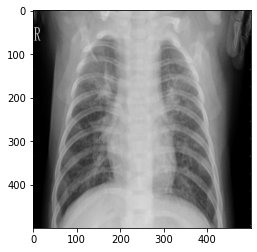

In [ ]:
path = '/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/pnemonia.jpeg'
print(img_predict(path))

This person didn't have pneumoniaNormal


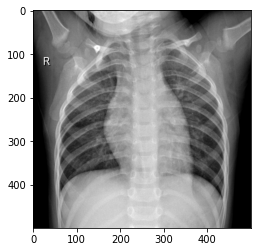

In [ ]:
path = '/content/drive/MyDrive/TASKS_ML_NETZWERK_ACADAMEY/DL/Chest_xray/chest_xray/train/NORMAL.jpeg'
print(img_predict(path))